In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
sns.set_theme(style="dark")

In [4]:

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

In [5]:
type(x)

numpy.ndarray

In [6]:
np.shape(x)

(10000,)

In [7]:
# z=np.stack([x,y]).reshape(-1)
# z=np.hstack([x,y])
z=np.stack([x,y]).T

In [8]:
np.shape(z)

(10000, 2)

In [9]:

scaler = StandardScaler()# Fit on training set only.
scaler.fit(z)# Apply transform to both the training set and the test set.
zprime = scaler.transform(z)
np.shape(zprime)

(10000, 2)

In [10]:
pca=PCA(n_components=2)
pca.fit(z)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
I = np.identity(2)
eigen = pca.transform(I)
# np.linalg.inv(eigen)
eigen 

array([[ 0.96332882,  0.20744407],
       [ 0.19125371, -0.9774188 ]])

In [12]:
pca.components_


array([[ 0.97846899,  0.20639388],
       [ 0.20639388, -0.97846899]])

Text(0, 0, '')

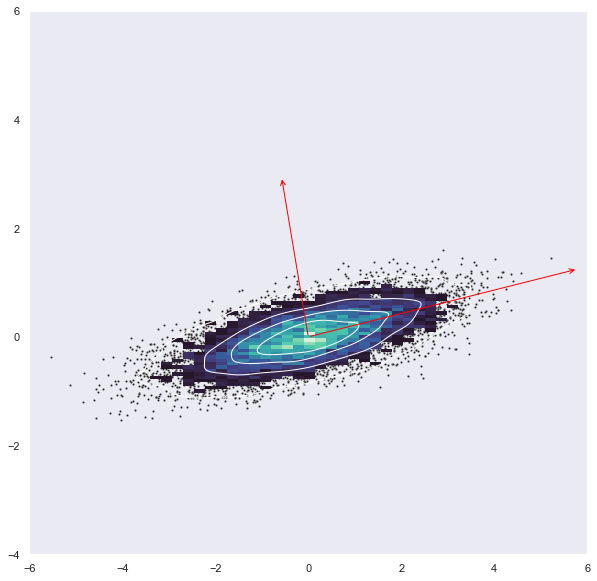

In [13]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
plt.xlim(-6,6)
plt.ylim(-4,6)

# plt.arrow(0,0, -3,1.2,  shape='full', head_width=0.1, head_length=0.15, color='yellow')
ax.annotate("", xy=6 * eigen[0,:].T, xytext=(0, 0),  arrowprops=dict(arrowstyle="->", color="red"))
ax.annotate("", xy= -3 * eigen[1,:].T, xytext=(0, 0),  arrowprops=dict(arrowstyle="->", color="red"))

Text(0, 0, '')

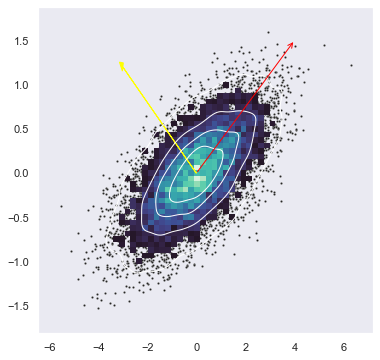

In [14]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)


plt.arrow(0,0, -3,1.2,  shape='full', head_width=0.1, head_length=0.15, color='yellow')
ax.annotate("", xy=(4,1.5), xytext=(0, 0),  arrowprops=dict(arrowstyle="->", color="red"))